<a href="https://colab.research.google.com/github/viitoriaraujoo/Data-Science-Projects-with-Python/blob/main/Exercicio%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de bons pagadores de cartão de crédito

## 1. Bibliotecas

In [ ]:
import pandas as pd

## 2. Carregamento de Dados

In [ ]:
df= pd.read_excel('https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

## 3. Verificando a integridade dos dados

### 3.1 Verificando as colunas

In [ ]:
df.columns, len (df.columns)

(Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month'],
       dtype='object'),
 25)



####3.1.1 Dicionário de Dados

- **LIMIT_BAL:** Valor do crédito fornecido (em novos dólares taiwaneses (NT)) inclusive o crédito do consumidor individual e familiar (complementar).

- **SEX:** Gênero (1 = masculino; 2 = feminino).

- **EDUCATION:** Instrução (1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros).

- **MARRIAGE:** Estado civil (1 = casado; 2 = solteiro; 3 = outros).

- **AGE:** Idade (ano).

- **PAY_1–PAY_6:** Registro de pagamentos passados. Pagamentos mensais passados, registrados de abril a setembro, são armazenados nessas colunas.
  - PAY_1 representa o status de reembolso em setembro;
  - PAY_2 = status de reembolso em agosto; e assim por diante até PAY_6, que representa o status de reembolso em abril.
  - A escala de medida do status de reembolso é a seguinte: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento; e assim por diante até 8 = atraso de oito meses no pagamento; 9 = atraso de nove meses ou mais no pagamento.

- **BILL_AMT1–BILL_AMT6:** Valor da fatura (em novos dólares taiwaneses).
  - BILL_AMT1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT7, que representa o valor da fatura em abril.

- **PAY_AMT1–PAY_AMT6:** Valor de pagamentos anteriores (novos dólares taiwaneses).
  - PAY_AMT1 representa o valor pago em setembro; PAY_AMT2 representa o valor pago em agosto; e assim por diante até PAY_AMT6, que representa o valor pago em abril.


### 3.2 Dando uma olhada nos nossos Dados

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3.3 Verificando se todos os IDs são únicos

In [ ]:
df['ID'].nunique()

29687

### 3.4 Verficando o total de linhas

In [ ]:
df.shape[0]

30000

In [ ]:
df.shape[0]-df['ID'].nunique()

313

### 3.5 Contagem de ID's

In [ ]:
id_counts=df['ID'].value_counts()

In [ ]:
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

### 3.6 Contagem de Repetições

In [ ]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

## 4. Análise de Dados Duplicados

### 4.1 IDs que se repetem

In [ ]:
dupe_mask= id_counts==2

In [ ]:
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

### 4.2 Exibindo os 5 primeiros indices

In [ ]:
id_counts.index[:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

### 4.3 Armazenando itens duplicados

In [ ]:
dupe_ids=id_counts.index[dupe_mask]

### 4.4 Convertendo em uma lista e obtendo seu tamanho

In [ ]:
dupe_ids = list(dupe_ids)

In [ ]:
len(dupe_ids)

313

### 4.5 As 5 primeiras entradas da lista

In [ ]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

### 4.6 Selecionando linhas com IDs duplicados

In [ ]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7 Preparando a matriz booleana para filtragem do Dataframe

In [ ]:
df_zero_mask = df == 0

### 4.8 Criando a série booleana

In [ ]:
 feature_zero_mask =df_zero_mask.iloc[:,1:].all(axis=1)

### 4.9 Somando a série booleana com todas as colunas zeradas (exceto ID)

In [ ]:
sum(feature_zero_mask)

315


### 4.10 Eliminar as linhas c/ todas as colunas zeradas

In [ ]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

### 4.11 Verificando o shape do Dataframe

In [ ]:
df_clean_1.shape

(29685, 25)

### 4.12 Verificando se o programa foi resolvido

In [ ]:
df_clean_1['ID'].nunique()

29685

## 5. Explorando e limpando os dados

### 5.1 Tipo de dado das colunas do Dataset

In [ ]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

### 5.2 Visualização as 5 primeiras linhas da série PAY_1

In [ ]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

### 5.3 Contagem de valores únicos

In [ ]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

### 5.4 Remoção dos valores ausentes com a máscara booleana

In [ ]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [ ]:
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

### 5.5 Soma da máscara Booleana para determinar quais não têm dados ausentes

In [ ]:
sum(valid_pay_1_mask)

26664

In [ ]:
df_clean_1.shape [0]- sum(valid_pay_1_mask)

3021

### 5.6 Limpeza das linhas com valores ausentes

In [ ]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

### 5.7 Dimensão do Dataframe

In [ ]:
df_clean_2.shape

(26664, 25)

### 5.8 Conversão de *object* para *int64*

In [ ]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [ ]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


**Explicações adicionais sobre as colunas feitas pelo sócio da empresa:**
*   -2: significa que a conta começou o mês
sem valor a ser pago e o crédito não
foi usado.
*   -1: significa que a conta usou um valor que foi totalmente pago
*   0: significa que o pagamento mínimo foi feito, mas o saldo total devedor
não foi pago (isto é, uma parcela do saldo devedor foi transportada para o
próximo mês)

## 6. Explorando o limite de crédito e as características demográficas

### 6.1 Importando bibliotecas e configurando o Matplotlib

In [ ]:
import matplotlib.pyplot as plt #importa o pacote de plotagem
#renderiza a plotagem automaticamente
%matplotlib inline
import matplotlib as mpl #recurso adicional de plotagem
mpl.rcParams['figure.dpi'] = 400 #definir a resolução para obtenção de uma imagem com boa nitidez

### 6.2 Visualização de histogramas

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>]], dtype=object)

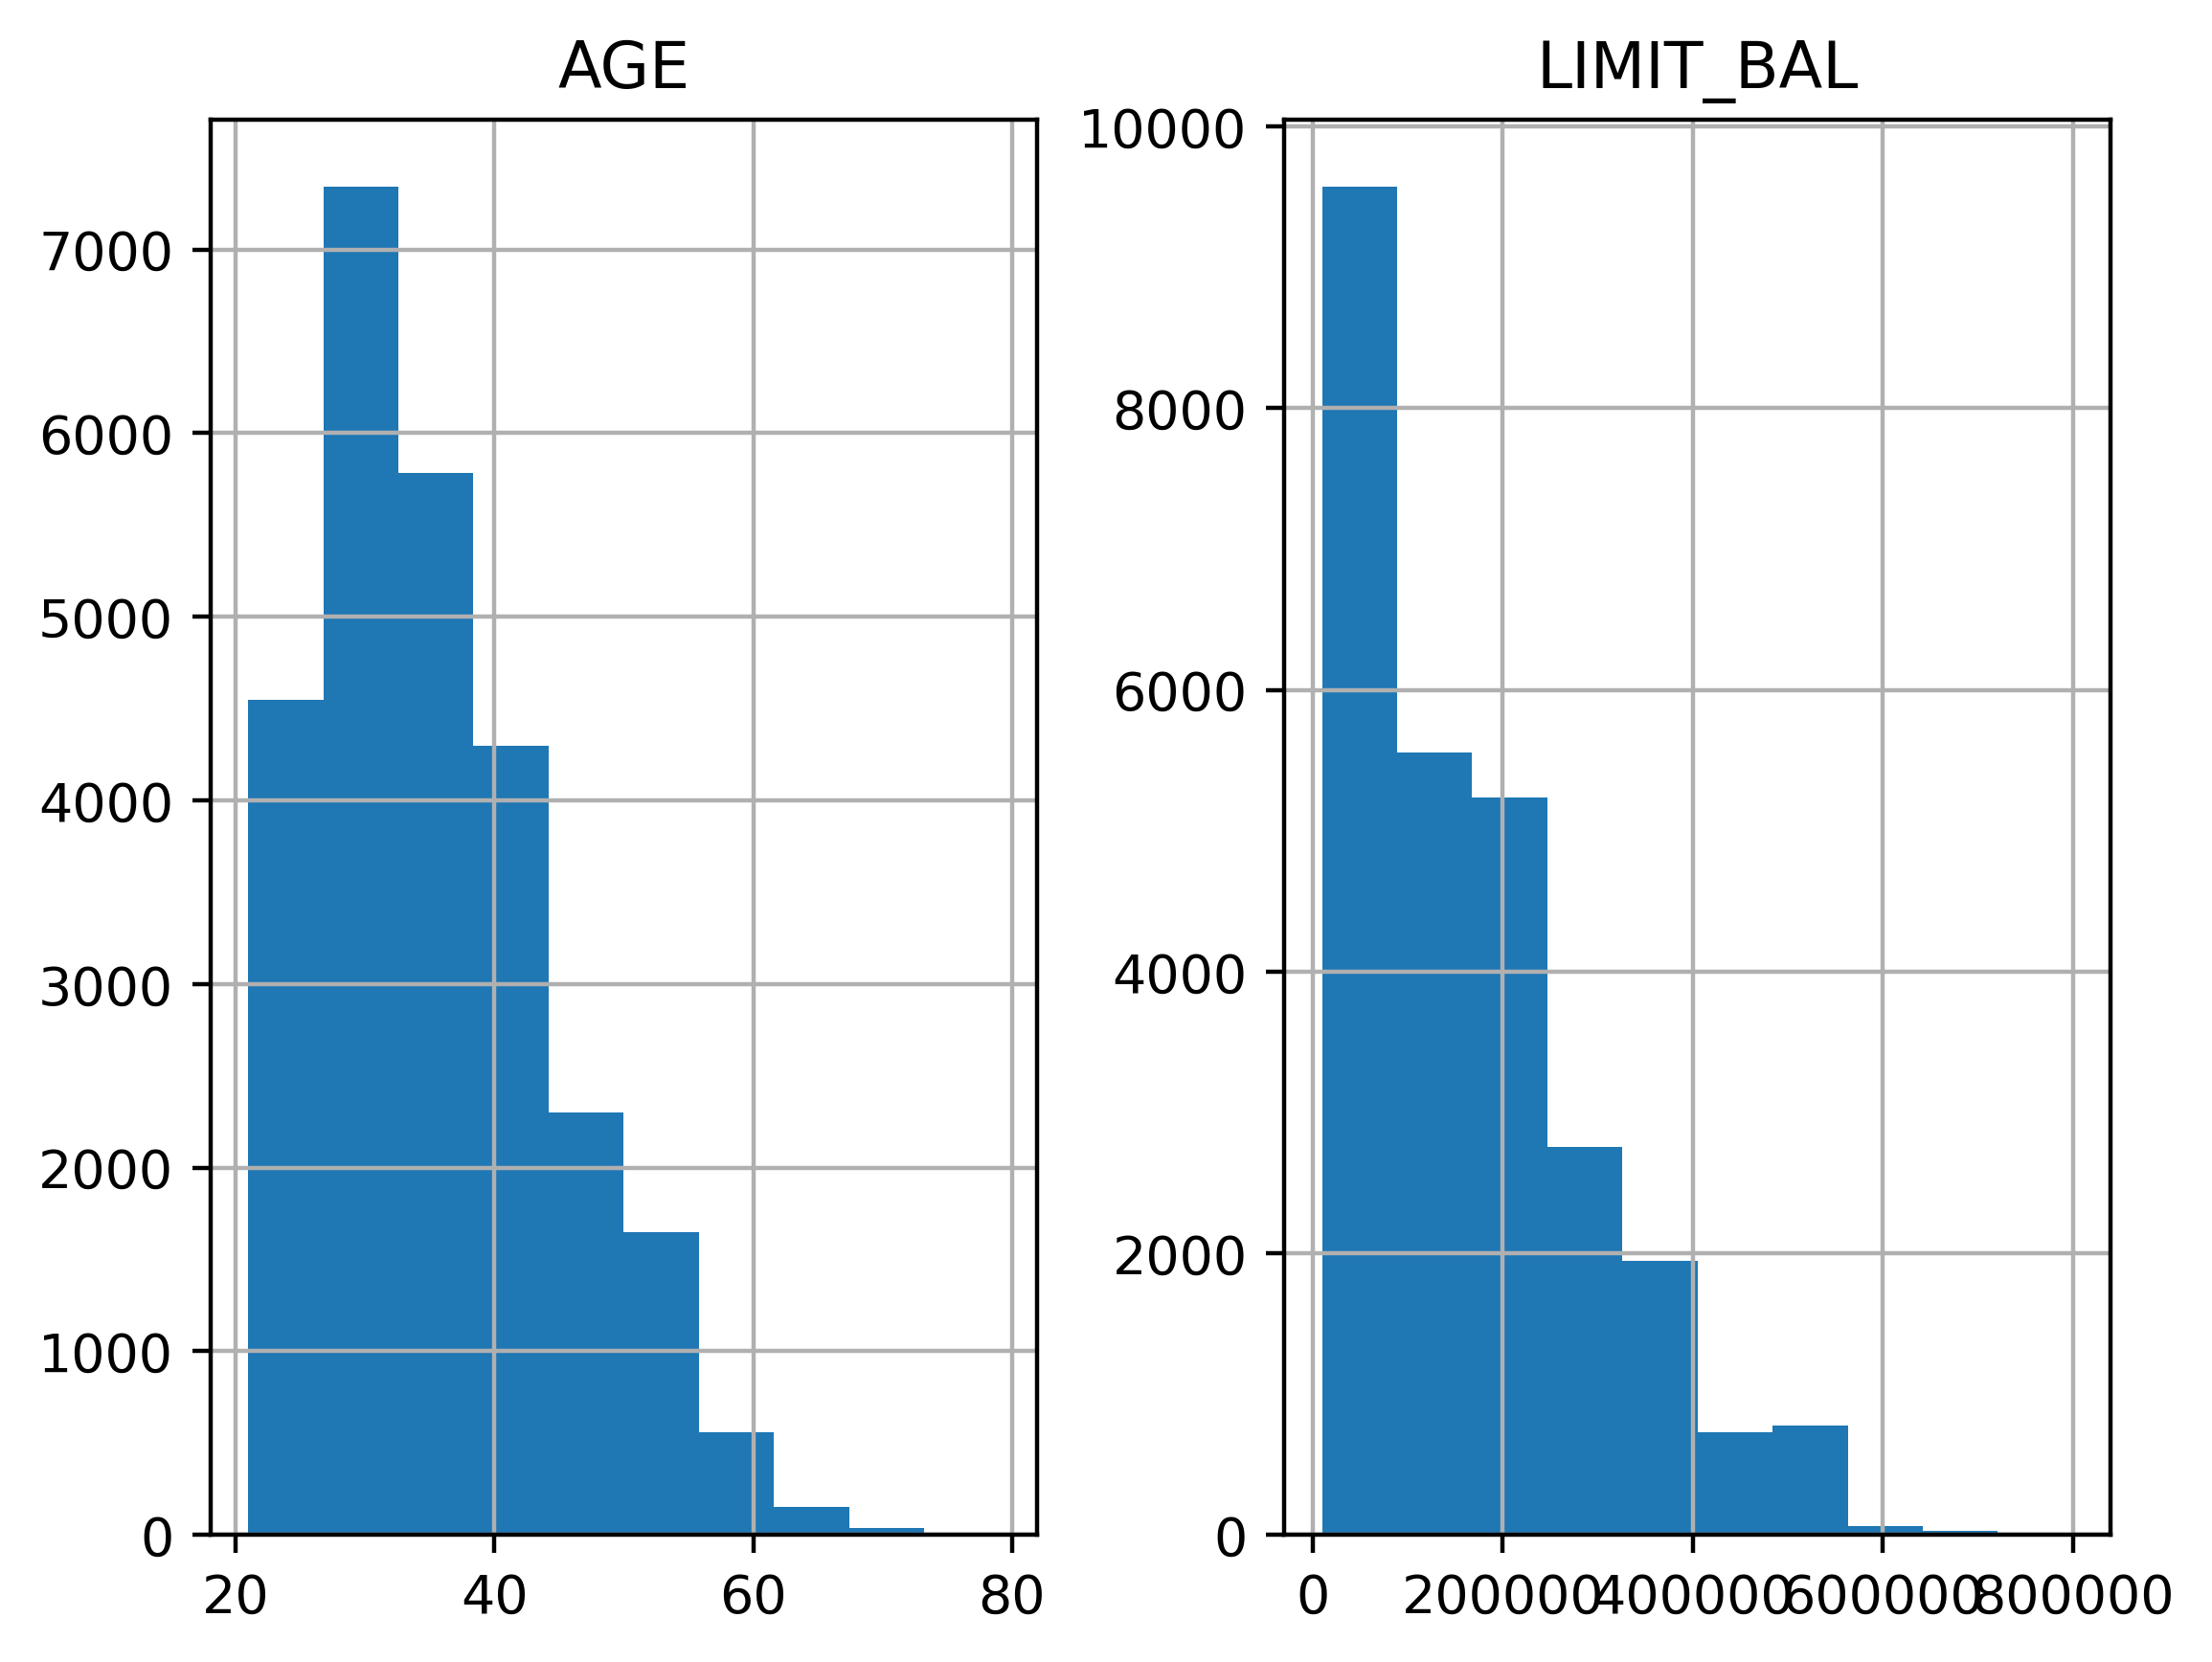

In [ ]:
df_clean_2[['AGE', 'LIMIT_BAL']].hist()

### 6.3  Geração de relatório tabular de síntese estatística

In [ ]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


* Descrição: O histograma calcula a contagem de não nulos, a média e o desvio-padrão, o valor mínimo, o valor máximo e os quartis.

### 6.4 Contagem de valores da característica *EDUCAÇÃO*

In [ ]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

**Descrição para a educação:**
* 1 = pós-graduação;
* 2 = universidade;
* 3 = ensino médio;
* 4 = outros

### 6.5 Agrupamento dos graus de instrução não documentadas a categoria "outros"

In [ ]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True) # substituir os correspondentes de 0,5,6 por 4. O inplace realiza a alteração no DataFrame existente.
df_clean_2['EDUCATION'].value_counts() # recontar

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

### 6.6 Contagem de valores da característica *MARRIAGE*

In [ ]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

**Descrição para a marriage:**
* 1 = casado;
* 2= solteiro;
* 3 = outros;

### 6.7 Agrupamento das características marriage não documentadas a categoria "outros"

In [ ]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True) # substituir os correspondentes de 0 por 3. O inplace realiza a alteração no DataFrame existente.
df_clean_2['MARRIAGE'].value_counts() # recontar

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Características Categóricas (Experimento)

<Axes: xlabel='EDUCATION'>

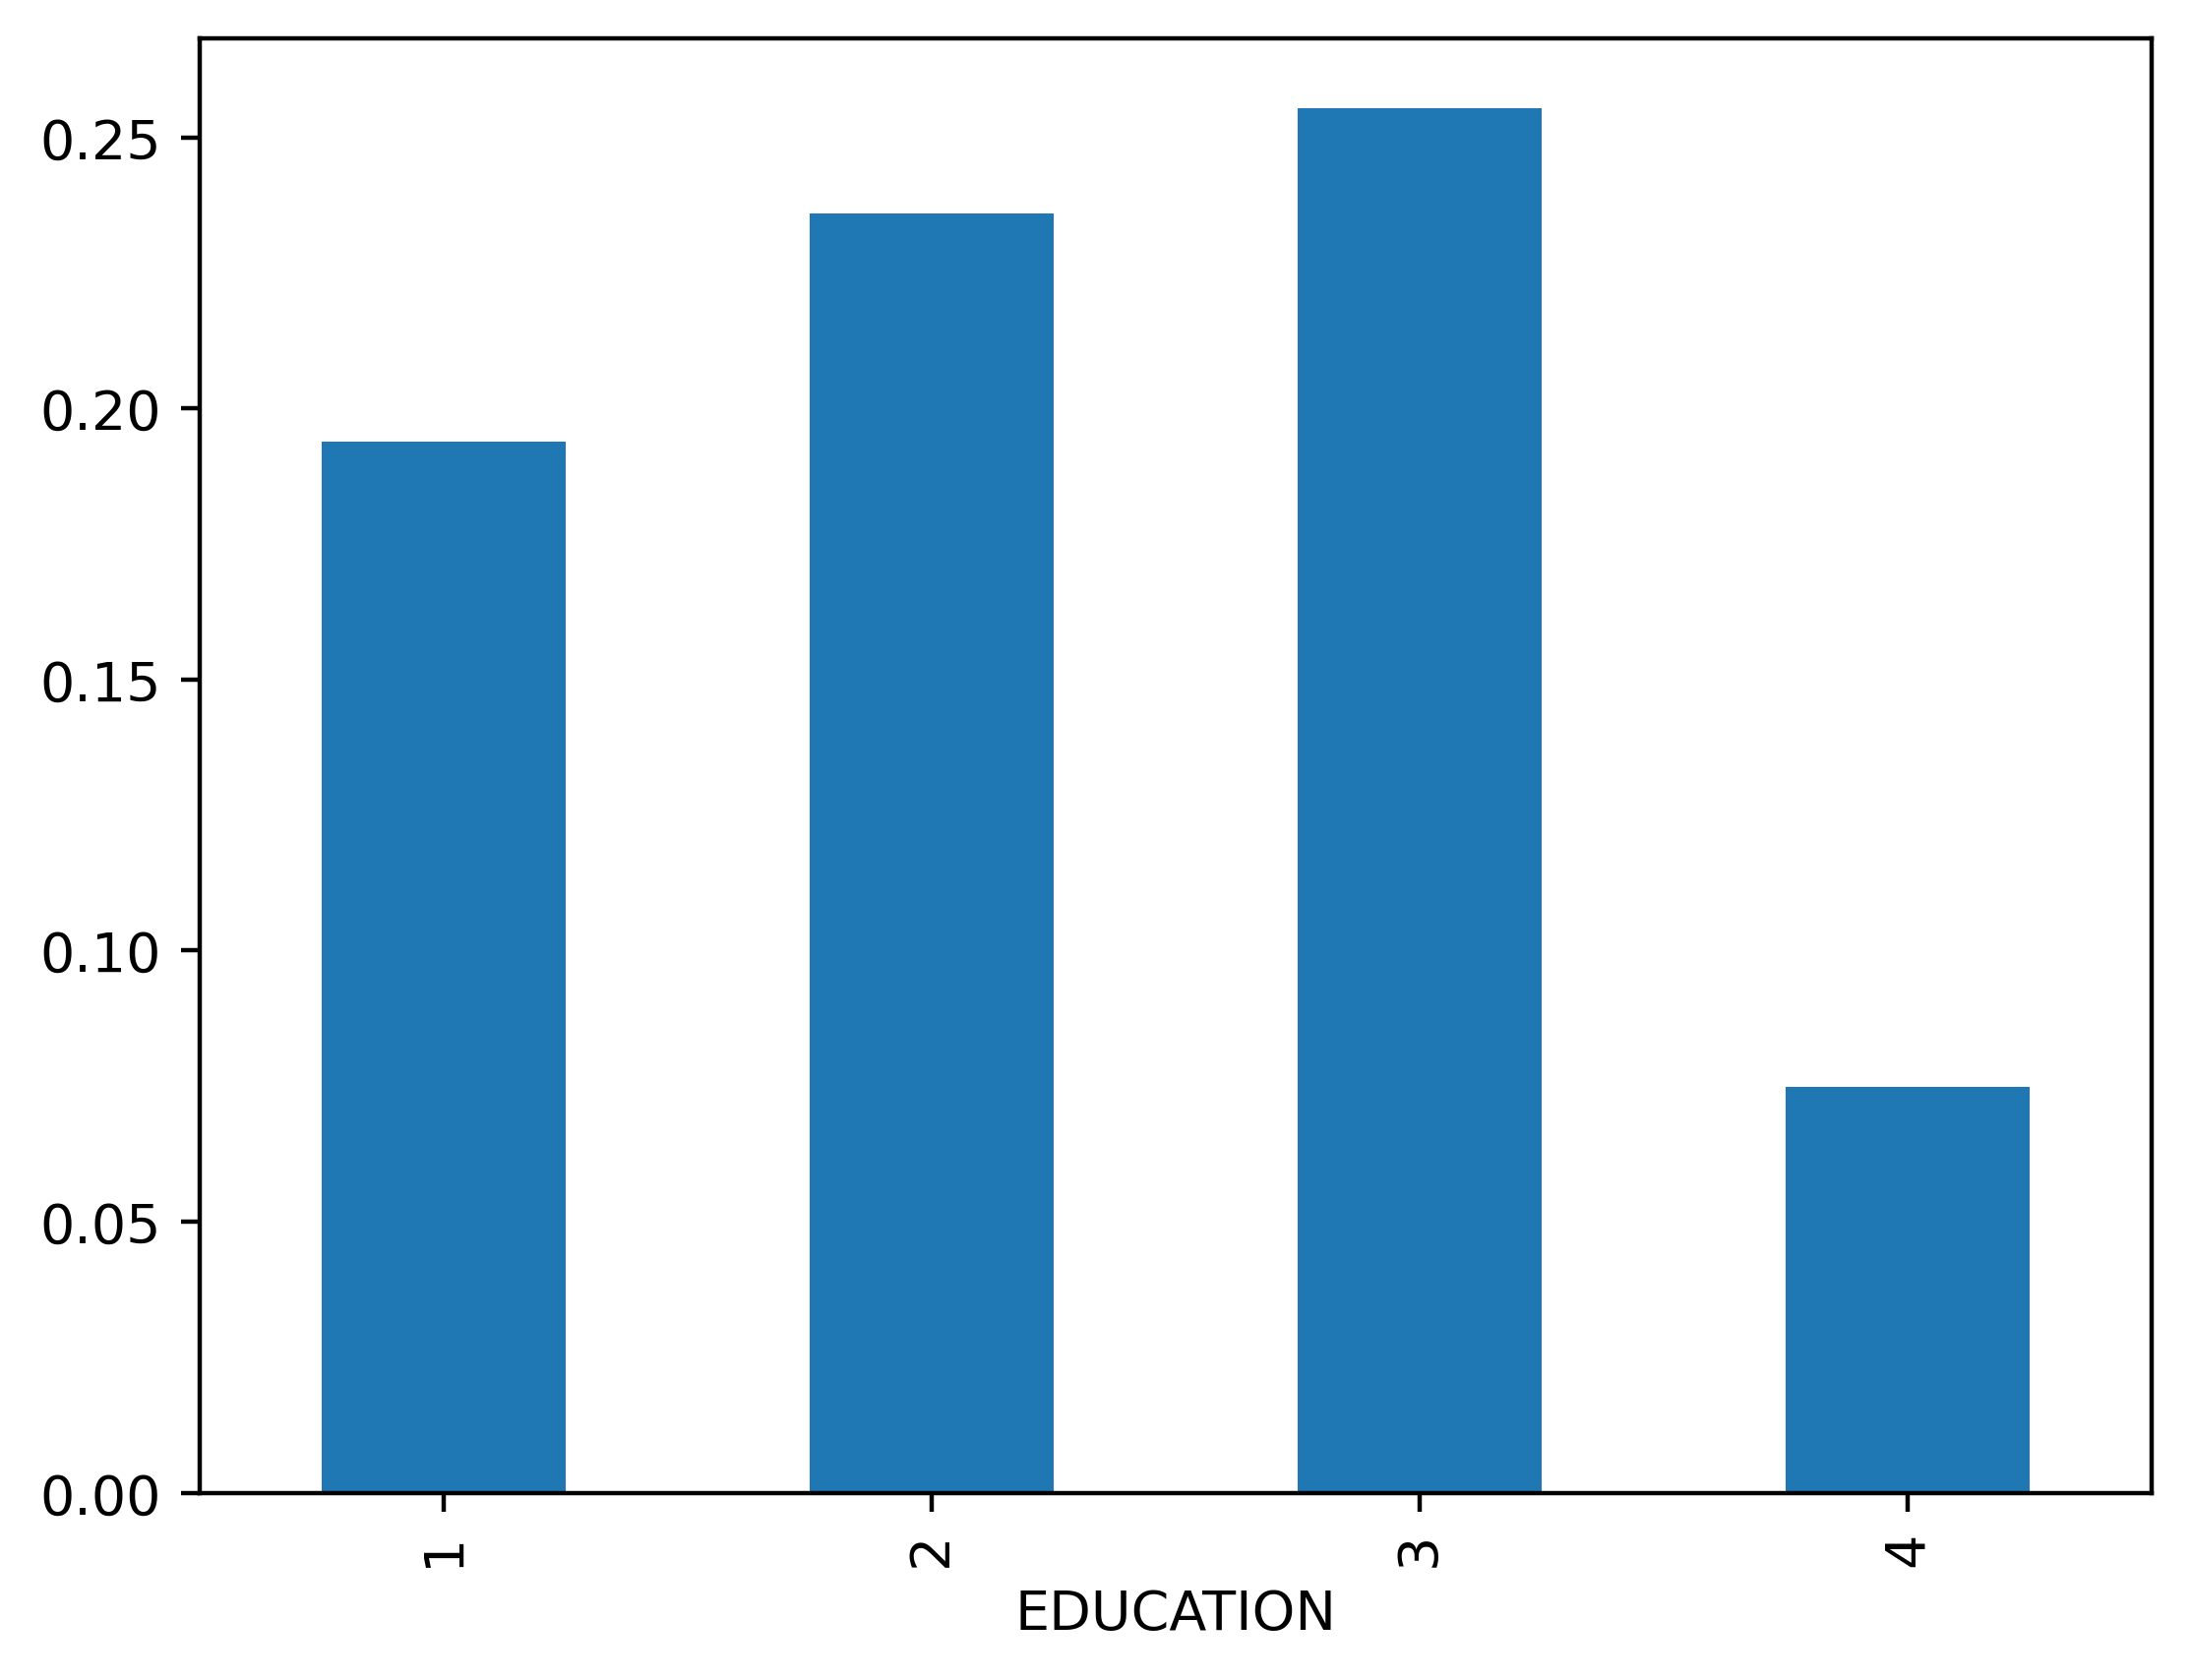

In [ ]:
df_clean_2.groupby('EDUCATION').agg({"default payment next month": 'mean'}).plot.bar(legend= False)


## 7. Implementando a OHE(codificação one-hot) para uma característica categórica

### 7.1 Criando uma coluna vazia

In [ ]:
df_clean_2['EDUCATION_CAT']='none'

### 7.2 Examinando as dez primeiras linhas do DataFrame referentes às colunas *EDUCATION* e *EDUCATION_CAT*


In [ ]:
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


### 7.3 Criando um dicionário de mapeamento de categorias

In [ ]:
cat_mapping = {
 1: "graduate school",
 2: "university",
 3: "high school",
 4: "others"
}

### 7.4 Aplicando o mapeamento de categorias

In [ ]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)  #map. usa um dicionário para estabelecer a corresp. entre os valores antigos e os novos

In [ ]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### 7.5 Codificação de características com OHE

In [ ]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


### 7.6 Concatenando o DataFrame original com o OHE

In [ ]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1) #Junta as tabelas lado a lado
df_with_ohe[['EDUCATION_CAT', 'graduate school',
 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [ ]:
df_with_ohe.to_csv('C:/Users/casa/Downloads/Cursos/Data Unicorn/Chapter_1_cleaned_data.csv', index=False)  #gravação do último DataFrame


## Explorando as características de histórico financeiro do dataset

In [ ]:
df=pd.read_csv('C:/Users/casa/Downloads/Cursos/Data Unicorn/Chapter_1_cleaned_data.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [ ]:
df.shape[1]

30

In [ ]:
df.columns, df.shape[1]

(Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month', 'EDUCATION_CAT', 'graduate school',
        'high school', 'others', 'university'],
       dtype='object'),
 30)

### Examinando o status dos pagamentos

In [ ]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

### Examinar sínteses estatísticas



In [ ]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
df[pay_feats[0]].value_counts().sort_index()   #  Contagens de valores do status dos pagamentos do mês anterior

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<Axes: >

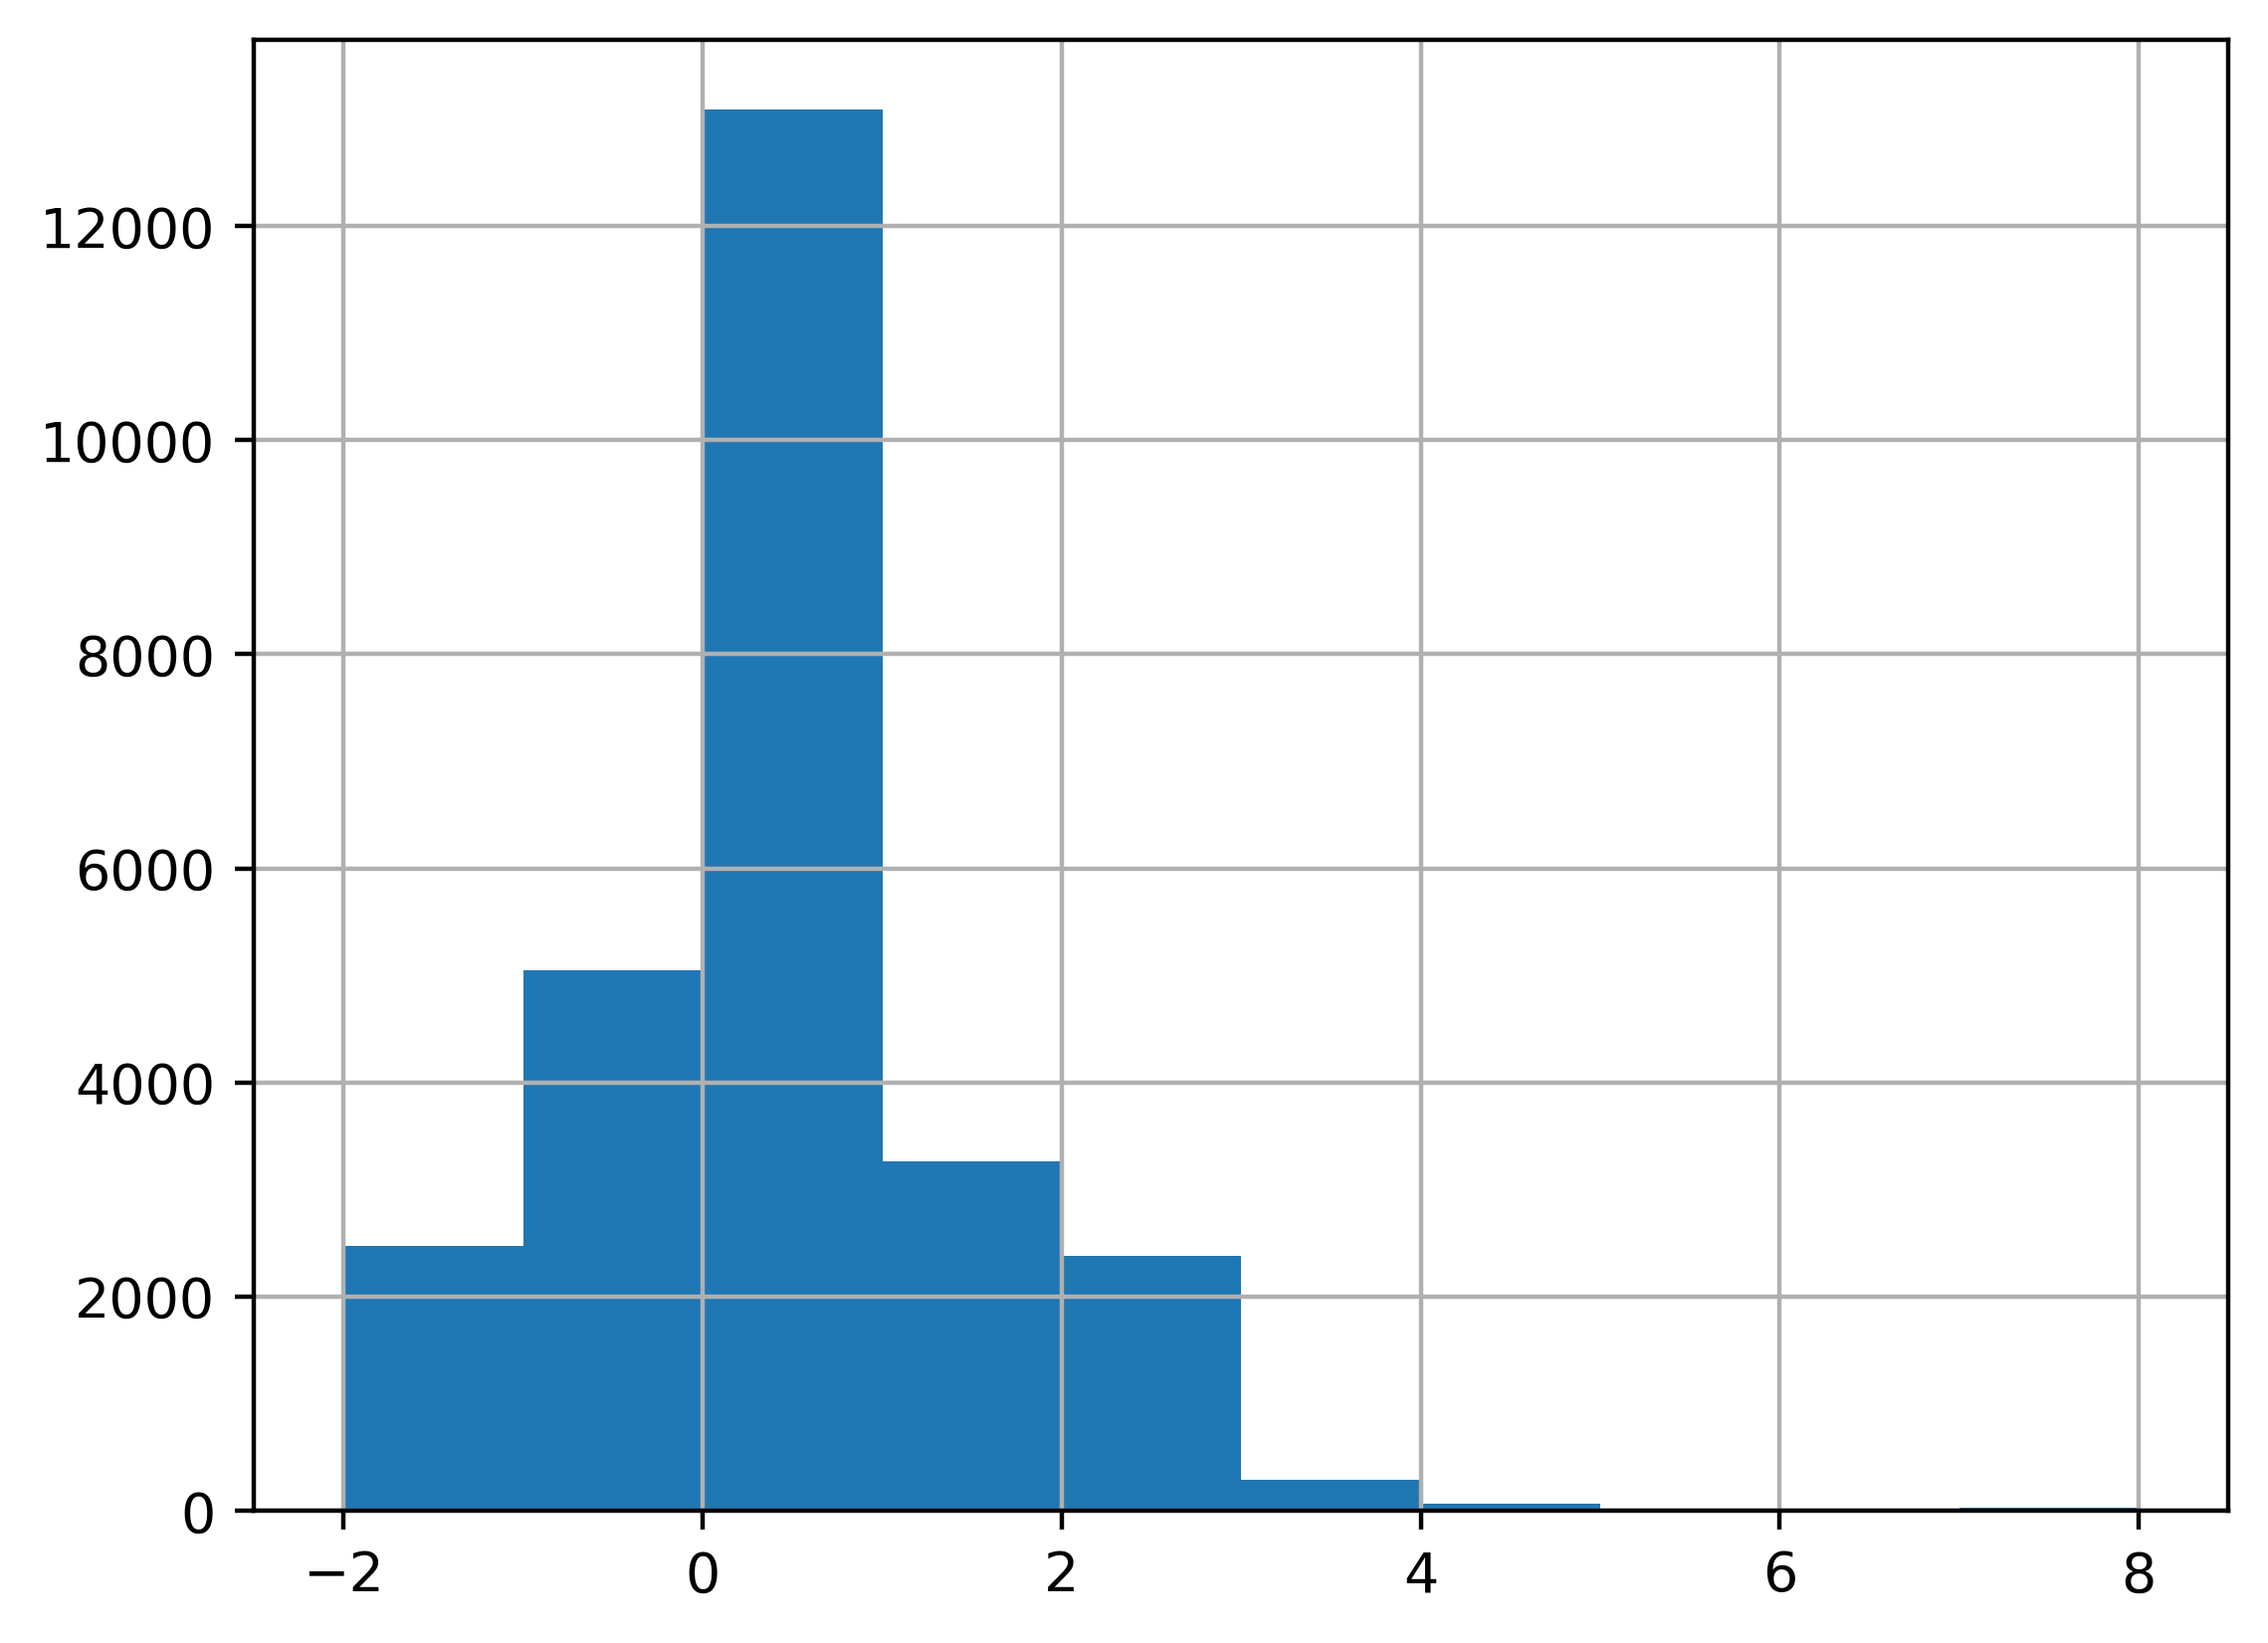

In [ ]:
df[pay_feats[0]].hist() #Histograma de PAY_1 usando argumentos padrão

In [ ]:
# Um array de 12 números está sendo discretizado em 11 intervalos, correspondendo a valores exclusivos da variável PAY_1.
import numpy as np
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

In [ ]:
# Usaremos as funções xlabel e ylabel do matplotlib para adicionar rótulos de eixos a essa plotagem.


Text(0, 0.5, 'Number of accounts')

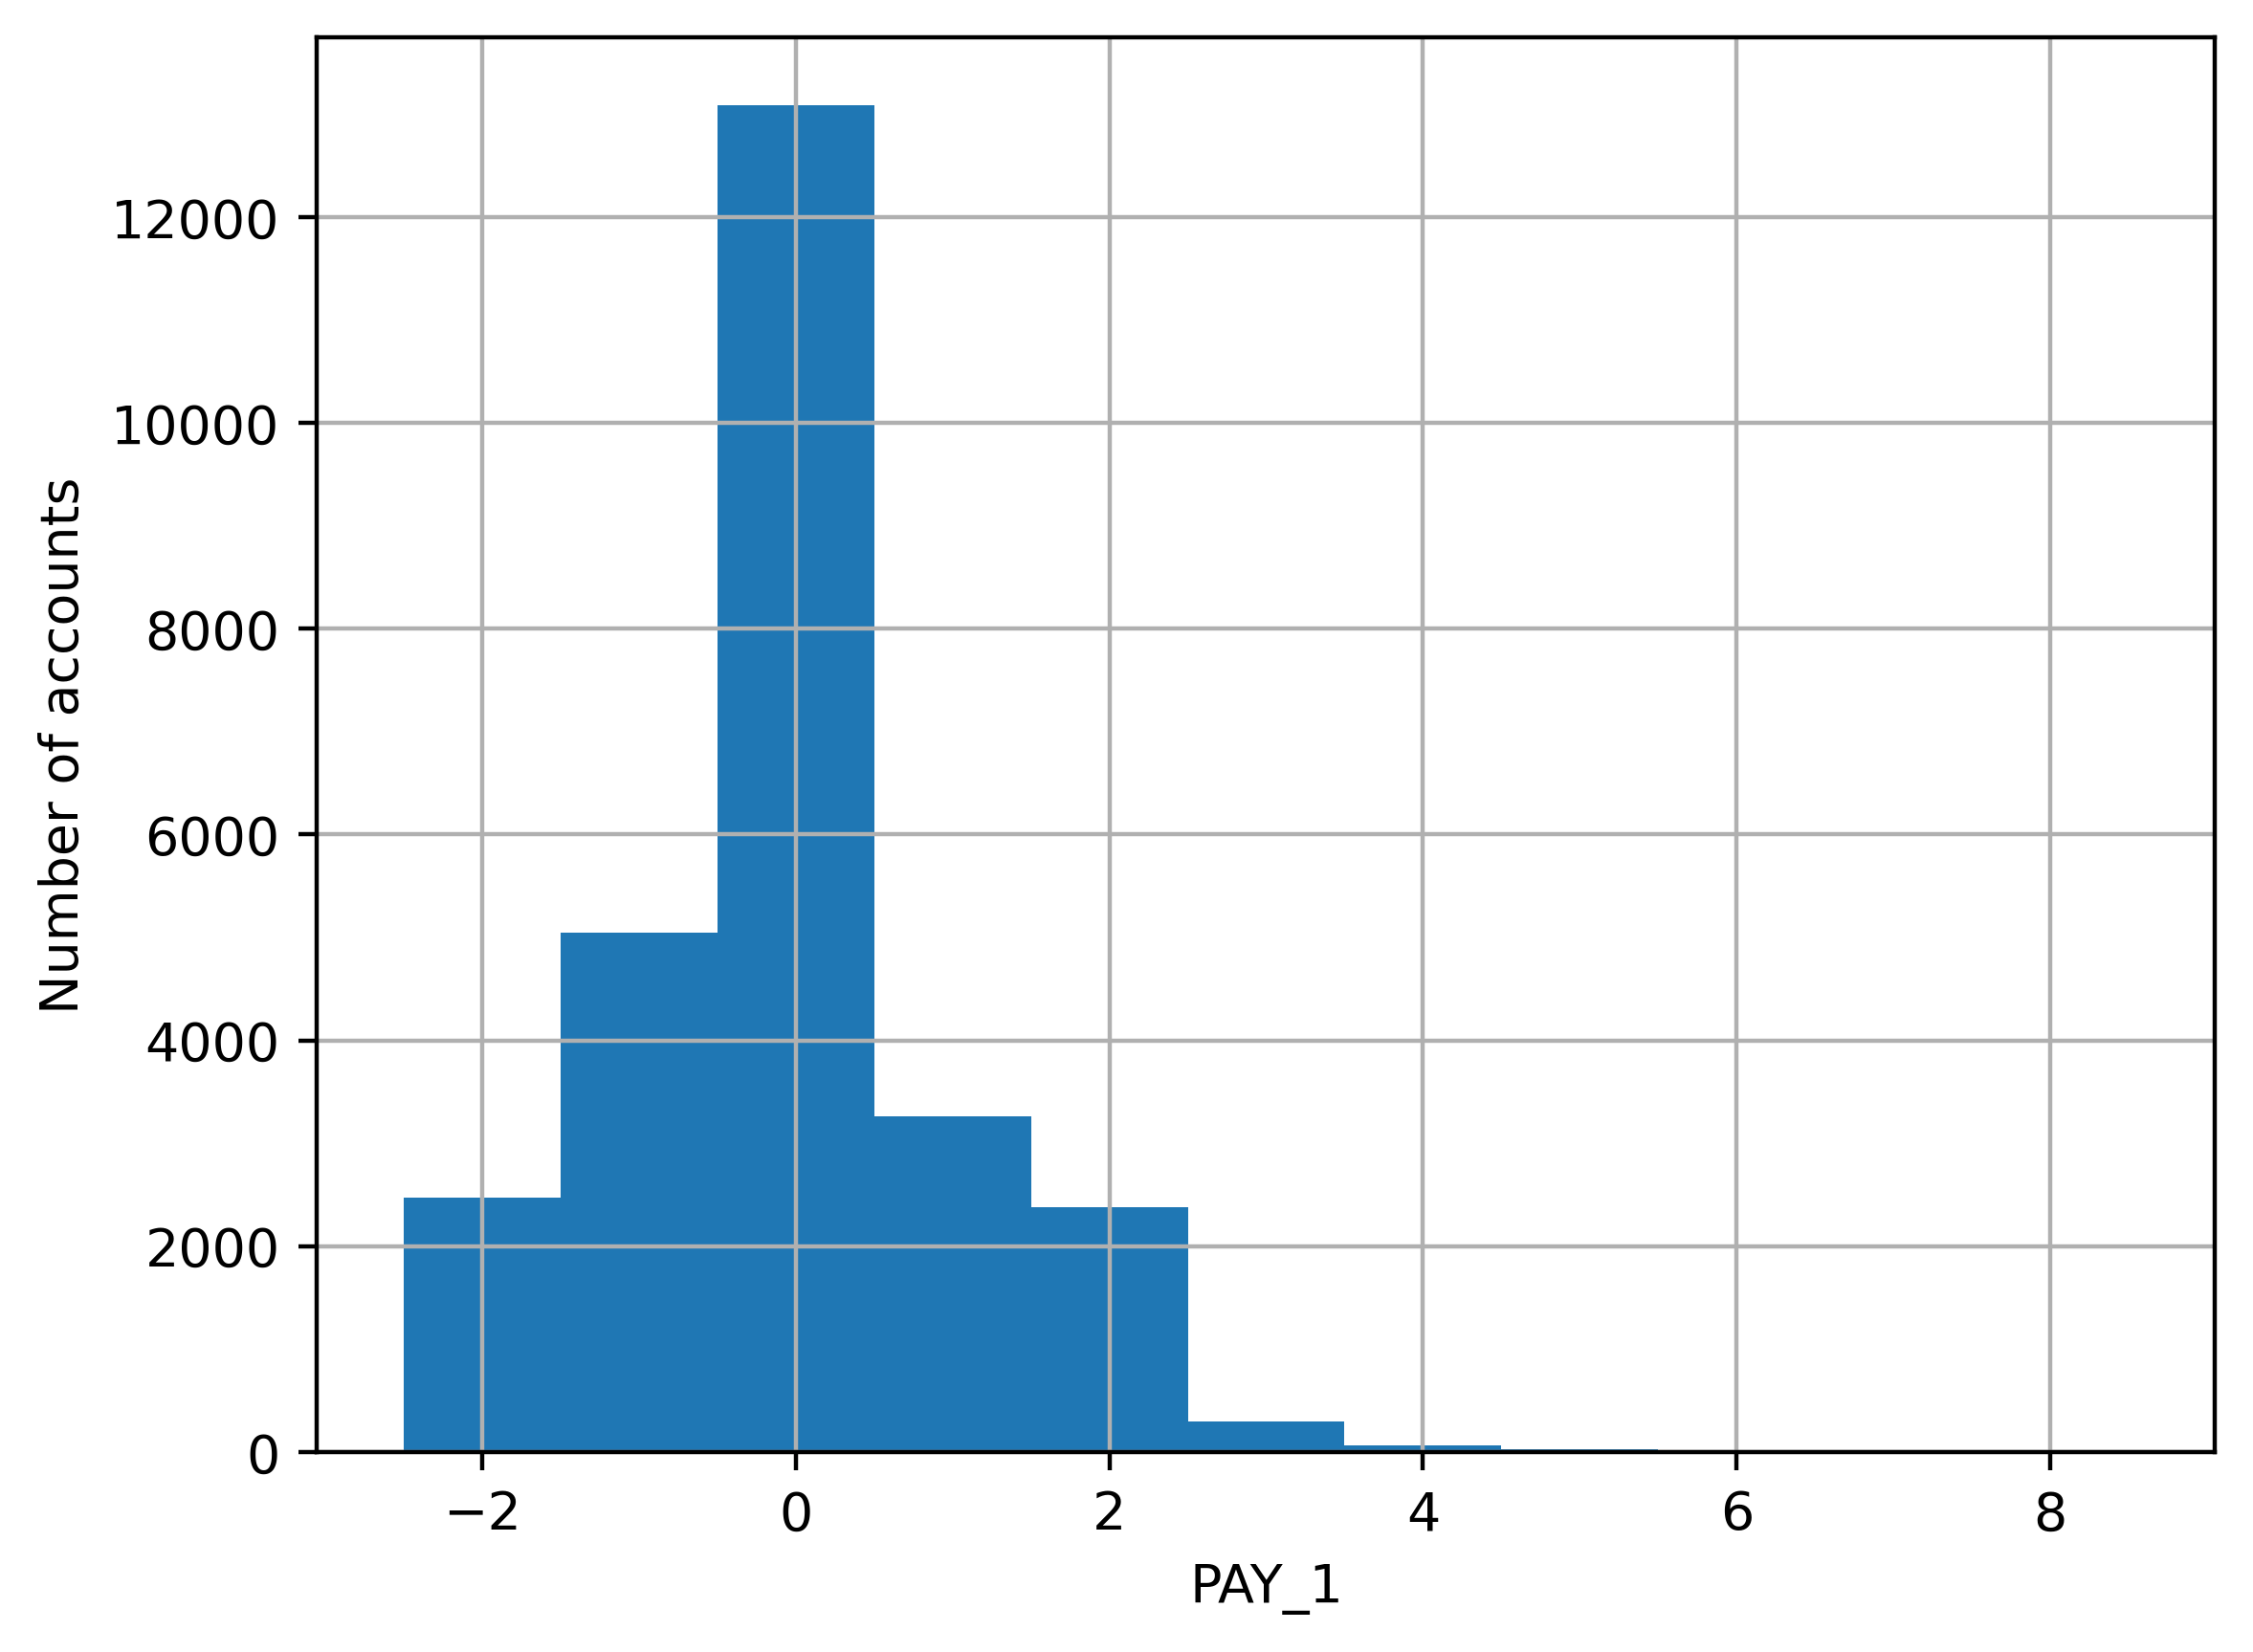

In [ ]:
df[pay_feats[0]].hist(bins=pay_1_bins) # histograma será dividido em intervalos (bins) definidos pelo array
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')  # A fim de criar visualizações de dados precisas e representativas

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

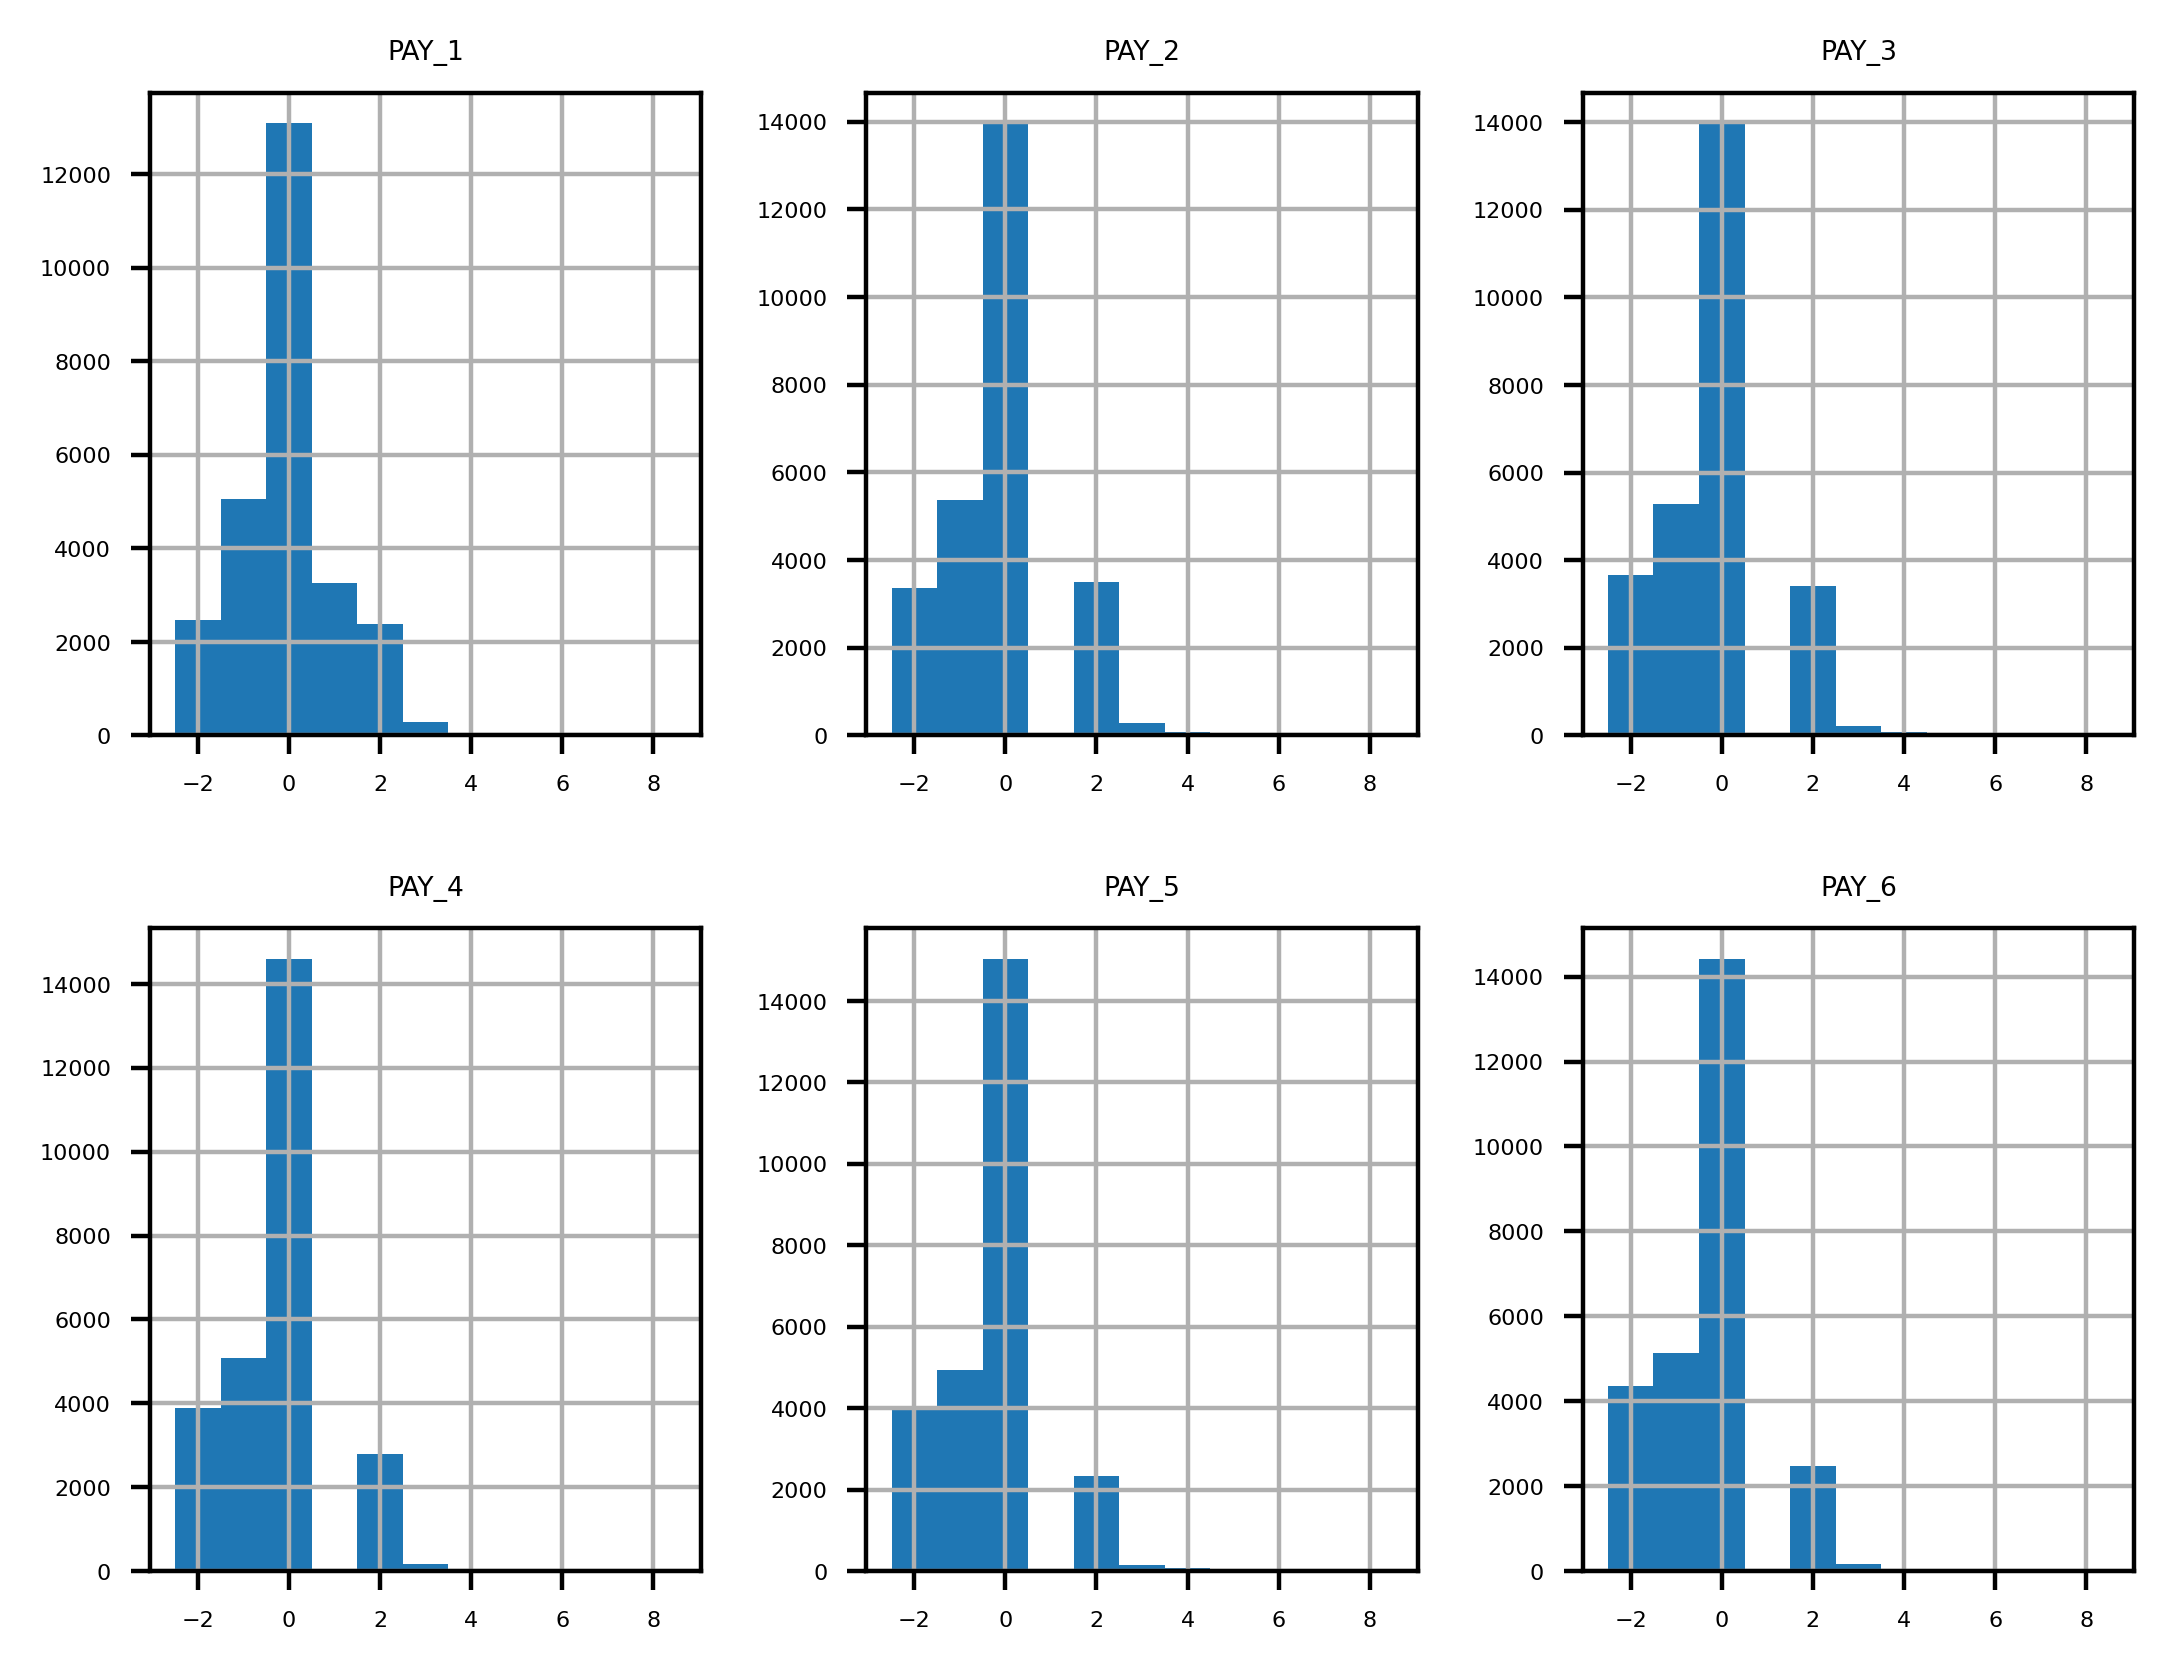

In [ ]:
# Definição do tamanho de fonte para caber as subplotagens
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3)) #organiza os histogramas em um layout de 2 linhas e 3 colunas


In [ ]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
